# Making the Most of your Colab Subscription



In [1]:
pip install yfinance fredapi newspaper3k vaderSentiment pandas numpy matplotlib seaborn

In [5]:
pip install ta

In [2]:
!pip install lxml_html_clean

In [3]:
import yfinance as yf
from fredapi import Fred
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from newspaper import Article
import datetime as dt
import ta

# Fetch SPY Market Data from Yahoo Finance

In [4]:
# Fetch SPY data
spy = yf.download("SPY", start="2010-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


**Yahoo Finance data period span:**




*   Start Date: January 1, 2010em
*   End Date: January 1, 2023 (excluding this date because Yahoo Finance defaults to "up to but not including" the end date)



In [7]:
# Download SPY data
spy = yf.download("SPY", start="2010-01-01", end="2023-01-01")

# Moving Averages
# Ensure 'Close' is a 1-dimensional Series by using `.squeeze()`
spy['SMA_20'] = ta.trend.sma_indicator(spy['Close'].squeeze(), window=20)
spy['SMA_50'] = ta.trend.sma_indicator(spy['Close'].squeeze(), window=50)

# RSI
spy['RSI_14'] = ta.momentum.rsi(spy['Close'].squeeze(), window=14)

# Bollinger Bands
# Pass the 'Close' Series directly to the BollingerBands constructor
bollinger = ta.volatility.BollingerBands(close=spy['Close'].squeeze(), window=20, window_dev=2)
spy['BB_High'] = bollinger.bollinger_hband()
spy['BB_Low'] = bollinger.bollinger_lband()

# Lagged Returns
spy['Return_1D'] = spy['Close'].pct_change(1)
spy['Return_5D'] = spy['Close'].pct_change(5)
spy['Return_10D'] = spy['Close'].pct_change(10)

# Print preview of the DataFrame
print(spy[['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'BB_High', 'BB_Low', 'Return_1D']].head())

[*********************100%***********************]  1 of 1 completed

Price            Close SMA_20 SMA_50 RSI_14 BB_High BB_Low Return_1D
Ticker             SPY                                              
Date                                                                
2010-01-04  113.330002    NaN    NaN    NaN     NaN    NaN       NaN
2010-01-05  113.629997    NaN    NaN    NaN     NaN    NaN  0.002647
2010-01-06  113.709999    NaN    NaN    NaN     NaN    NaN  0.000704
2010-01-07  114.190002    NaN    NaN    NaN     NaN    NaN  0.004221
2010-01-08  114.570000    NaN    NaN    NaN     NaN    NaN  0.003328


*The first few rows where the data initiates are null, this is normal, because for columns like SMA_20, SMA_50, RSI_14, and Bollinger Bands (BB_High, BB_Low), there is a requirement for minimum nu,ber of periods, (20 daus. 50 days, 14 days) until these moving averages, the relative strenght index and the Bollinger Bands (based on 20 day period moving average) can be calculated to display a result*

**Quick Finance literature review**

**RSI** stands for Relative Strength Index. It's a popular momentum oscillator used in technical analysis to measure the speed and change of price movements of an asset.

*   The RSI value ranges from 0 to 100. Generally, RSI values below 30 are considered oversold, indicating a potential buying opportunity, while values above 70 are considered overbought, suggesting a potential selling opportunity.


**Moving Averages (MAs):**

A moving average (MA) is a technical analysis indicator that smooths out price fluctuations by averaging past closing prices over a specific period.
Here we calculate two moving averages for the SPY ETF:
SMA_20: This is a 20-day simple moving average (SMA), which gives equal weight to the closing prices of the last 20 days.
SMA_50: This is a 50-day SMA, which gives equal weight to the closing prices of the last 50 days.
MAs are used in trading to identify trends, support and resistance levels. A rising MA suggests an uptrend, while a falling MA suggests a downtrend. The price may find support near the SMA line, or act as resistance when it tries to cross above it.


**Bollinger Bands (BB):**

Bollinger Bands are a volatility indicator that consists of a moving average (usually a 20-day SMA) and two bands above and below it.
To follow this, we created our Bollinger Bands using the ta.volatility.BollingerBands function:
window=20: This is specifying the lookback period for the central moving average of 20 days
window_dev=2: This is setting the number of standard deviations above and below the moving average for the upper and lower bands, respectively.


*   The width of the Bollinger Bands reflects market volatility. Narrow bands indicate low volatility, while wide bands indicate high volatility.
*   When the price reaches the upper band, it may be considered overbought, suggesting a potential price pullback. Conversely, reaching the lower band may suggest an oversold condition and a possible price increase.

**Lagged Returns:**

Lagged returns measure the percentage change in price over a specific period compared to a previous period.

In our code, we calculate three lagged returns for the SPY ETF:
* Return_1D: It is the daily return (% delta) of the closing price compared to the previous day's closing price.
* Return_5D: It is the 5-day return, comparing the closing price to the closing price 5 days ago.
* Return_10D: Represents the 10-day return, comparing the closing price to the closing price 10 days ago.

* Lagged returns are helpful to identify trends: Positive returns indicate price increases, negative returns indicate price decreases.

**Let's drop the incomeplete rows to work with complete data!**

In [8]:
spy.dropna(inplace=True)

In [9]:
print(spy.isna().sum())

Price       Ticker
Adj Close   SPY       0
Close       SPY       0
High        SPY       0
Low         SPY       0
Open        SPY       0
Volume      SPY       0
SMA_20                0
SMA_50                0
RSI_14                0
BB_High               0
BB_Low                0
Return_1D             0
Return_5D             0
Return_10D            0
dtype: int64


In [16]:
spy[['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'BB_High', 'BB_Low', 'Return_1D']].head()

Price,Close,SMA_20,SMA_50,RSI_14,BB_High,BB_Low,Return_1D
Ticker,SPY,,,,,,
Date,,,,,,,
2010-03-16,116.410004,112.765000,111.5888,75.054675,116.879445,108.650555,0.007966
2010-03-17,117.099998,113.107000,111.6642,77.195284,117.461795,108.752204,0.005927
2010-03-18,117.040001,113.413499,111.7324,76.579915,117.965072,108.861927,-0.000512
2010-03-19,115.970001,113.655000,111.7776,66.412120,118.210974,109.099025,-0.009142
2010-03-22,116.589996,113.926499,111.8256,68.982012,118.502512,109.350486,0.005346


# Fetch Economic Data Using FRED API

In [20]:
fred = Fred(api_key='33ab67756c1705f841e5d1a50acc7667')

In [22]:
# Fetch economic data (e.g., interest rates, unemployment rate)
unemployment_rate = fred.get_series('UNRATE')  # Unemployment rate
fed_funds_rate = fred.get_series('FEDFUNDS')  # Federal funds rate

# Convert to DataFrame
econ_data = pd.DataFrame({
    'Unemployment Rate': unemployment_rate,
    'Fed Funds Rate': fed_funds_rate
})
econ_data.index.name = 'Date'
econ_data.reset_index(inplace=True)

# Print preview
print(econ_data.tail())


          Date  Unemployment Rate  Fed Funds Rate
918 2024-07-01                4.3            5.33
919 2024-08-01                4.2            5.33
920 2024-09-01                4.1            5.13
921 2024-10-01                4.1            4.83
922 2024-11-01                4.2            4.64



**Note on the Fed Funds Rate**: It is the interest rate at which banks lend reserves to each other overnight.
It is not directly "set", but it's targeted by the Federal Reserve as part of its monetary policy. The Fed uses tools like open market operations to influence the rate.

* Purpose:

1. To control inflation
2. To influence economic growth
3. To stabilize the financial system

* Higher Fed Funds Rates generally lead to slower economic growth, reducing inflation but also impacting equity markets negatively.
* Lower rates tend to encourage borrowing and investment, which can fuel economic and market growth.


# Step 5: Fetch Sentiment Data Using Google News API

We’ll scrape Google News headlines, extract the text, and perform sentiment analysis using VADER.



In [30]:
import requests
from bs4 import BeautifulSoup
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Example list of financial news URLs
news_urls = [
    'https://finance.yahoo.com/topic/stock-market-news/',
    'https://www.reuters.com/markets/economy.html'
]

# Financial keywords to filter for relevant headlines
financial_keywords = ['stock', 'market', 'Wall Street', 'S&P', 'Dow', 'economy', 'fund', 'finance']

# Function to fetch, filter, and analyze sentiment
news_sentiments = []

for url in news_urls:
    try:
        # Add user-agent header to mimic a browser
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract all headlines (adjust the tag/class based on the site's structure)
        headlines = [h.text for h in soup.find_all('h3')]  # Update 'h3' if necessary for specific sites

        # Filter headlines: Minimum length and relevant financial keywords
        filtered_headlines = [
            headline for headline in headlines
            if len(headline.split()) > 2 and any(keyword.lower() in headline.lower() for keyword in financial_keywords)
        ]

        for headline in filtered_headlines:
            # Perform sentiment analysis
            sentiment = analyzer.polarity_scores(headline)
            sentiment['headline'] = headline
            news_sentiments.append(sentiment)

    except Exception as e:
        print(f"Failed to process URL {url}: {e}")

# Convert to DataFrame
sentiment_df = pd.DataFrame(news_sentiments)
display(sentiment_df.head())


,neg,neu,pos,compound,headline
0,0.0,1.000,0.000,0.0000,Wall Street's 2025 outlook for stocks
1,0.0,0.886,0.114,0.2023,How Trump's policies could lead to a resurgenc...
2,0.0,1.000,0.000,0.0000,Analysts reset GitLab stock price target after...
3,0.0,0.769,0.231,0.2023,5 top stock market themes for 2025
4,0.0,1.000,0.000,0.0000,Why Apple has little to do with these 2 rockin...


In [12]:
import requests
from bs4 import BeautifulSoup
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from datetime import datetime, timedelta

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Financial keywords to filter for relevant headlines
financial_keywords = ['stock', 'market', 'Wall Street', 'S&P', 'Dow', 'economy', 'fund', 'finance']

# Start and end dates (matching SPY range)
start_date = datetime(2010, 3, 16)
end_date = datetime(2022, 12, 30)

# Base URL
news_url_template = 'https://finance.yahoo.com/topic/stock-market-news/'

# Initialize list for storing news sentiments
news_sentiments = []

# Loop over the date range
current_date = start_date
while current_date <= end_date:
    try:
        # Format the date (adjust based on the site's URL parameters if needed)
        date_str = current_date.strftime('%Y-%m-%d')

        # Add query parameters for date (update this part if the site supports date-specific queries)
        url = f"{news_url_template}?date={date_str}"  # Example: Add `?date` parameter if supported

        # Request the webpage
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract all headlines
        headlines = [h.text for h in soup.find_all('h3')]

        # Filter headlines: Minimum length and relevant financial keywords
        filtered_headlines = [
            headline for headline in headlines
            if len(headline.split()) > 2 and any(keyword.lower() in headline.lower() for keyword in financial_keywords)
        ]

        for headline in filtered_headlines:
            # Perform sentiment analysis
            sentiment = analyzer.polarity_scores(headline)
            sentiment['headline'] = headline
            sentiment['date'] = current_date.date()  # Assign the current date
            news_sentiments.append(sentiment)

        print(f"Processed news for {date_str}")

    except Exception as e:
        print(f"Failed to process news for {date_str}: {e}")

    # Increment the date by one day
    current_date += timedelta(days=1)

# Convert to DataFrame
sentiment_df = pd.DataFrame(news_sentiments)

# Save the dataset
sentiment_df.to_csv('sentiment_data_with_historical_dates.csv', index=False)
print("Sentiment dataset saved as 'sentiment_data_with_historical_dates.csv'")


Processed news for 2010-03-16
Processed news for 2010-03-17
Processed news for 2010-03-18
Processed news for 2010-03-19
Processed news for 2010-03-20
Processed news for 2010-03-21
Processed news for 2010-03-22
Processed news for 2010-03-23
Processed news for 2010-03-24
Processed news for 2010-03-25
Processed news for 2010-03-26
Processed news for 2010-03-27
Processed news for 2010-03-28
Processed news for 2010-03-29
Processed news for 2010-03-30
Processed news for 2010-03-31
Processed news for 2010-04-01
Processed news for 2010-04-02
Processed news for 2010-04-03
Processed news for 2010-04-04
Processed news for 2010-04-05
Processed news for 2010-04-06
Processed news for 2010-04-07
Processed news for 2010-04-08
Processed news for 2010-04-09
Processed news for 2010-04-10
Processed news for 2010-04-11
Processed news for 2010-04-12
Processed news for 2010-04-13
Processed news for 2010-04-14
Processed news for 2010-04-15
Processed news for 2010-04-16
Processed news for 2010-04-17
Processed 

In [13]:
sentiment_df.head()

,neg,neu,pos,compound,headline,date
0,0.259,0.506,0.234,-0.1027,"South Korean Stocks Slide, Won Dips as Politic...",2010-03-16
1,0.238,0.762,0.000,-0.3612,"Asia stocks slugged by South Korea turmoil, Ch...",2010-03-16
2,0.000,1.000,0.000,0.0000,Five Key Charts to Watch in Global Commodity M...,2010-03-16
3,0.000,1.000,0.000,0.0000,‘The mother of all bubbles’ in the US is sucki...,2010-03-16
4,0.000,0.853,0.147,0.4767,"Sports, pop culture, and the weather: What's n...",2010-03-16


In [14]:
print("Average Sentiment:", sentiment_df['compound'].mean())

Average Sentiment: 0.05684788946561071


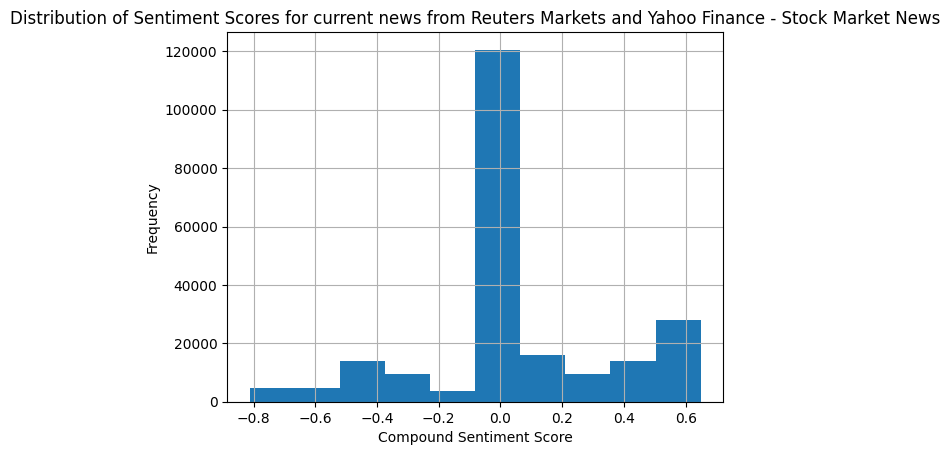

In [15]:
import matplotlib.pyplot as plt
sentiment_df['compound'].hist(bins=10)
plt.title("Distribution of Sentiment Scores for current news from Reuters Markets and Yahoo Finance - Stock Market News")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.show()


**Exploratory Data Analysis (EDA)**

*Visualizing SPY Data*

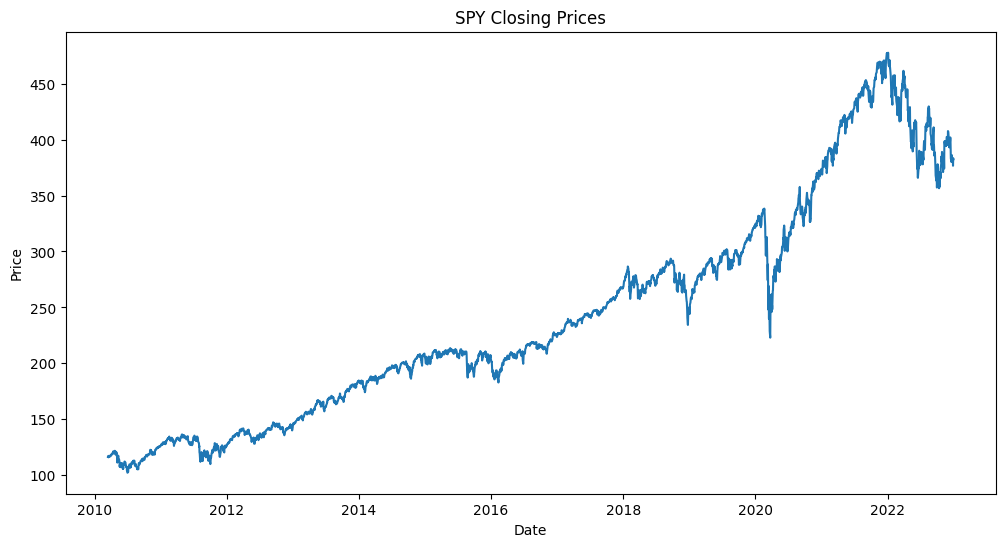

In [34]:
# Plot SPY Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(spy['Close'])
plt.title("SPY Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

*Technical Indicator Correlation*

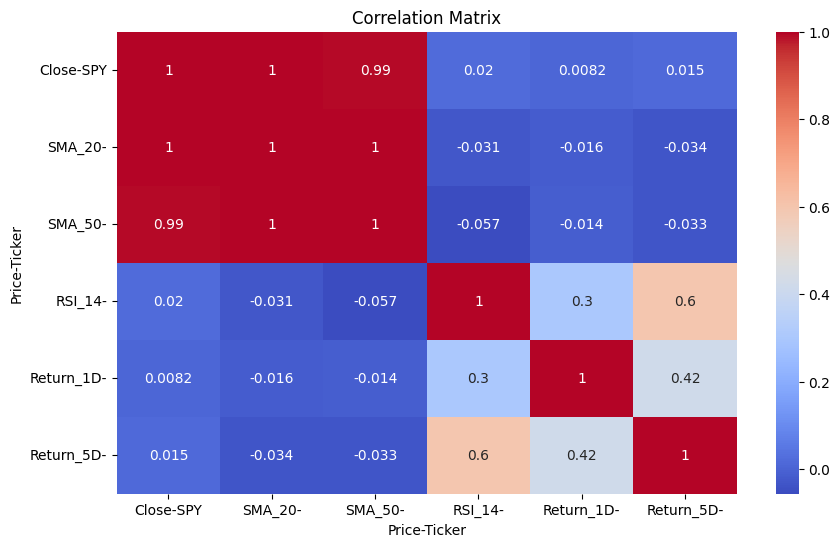

In [35]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(spy[['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'Return_1D', 'Return_5D']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

*Economic Indicators Over Time*

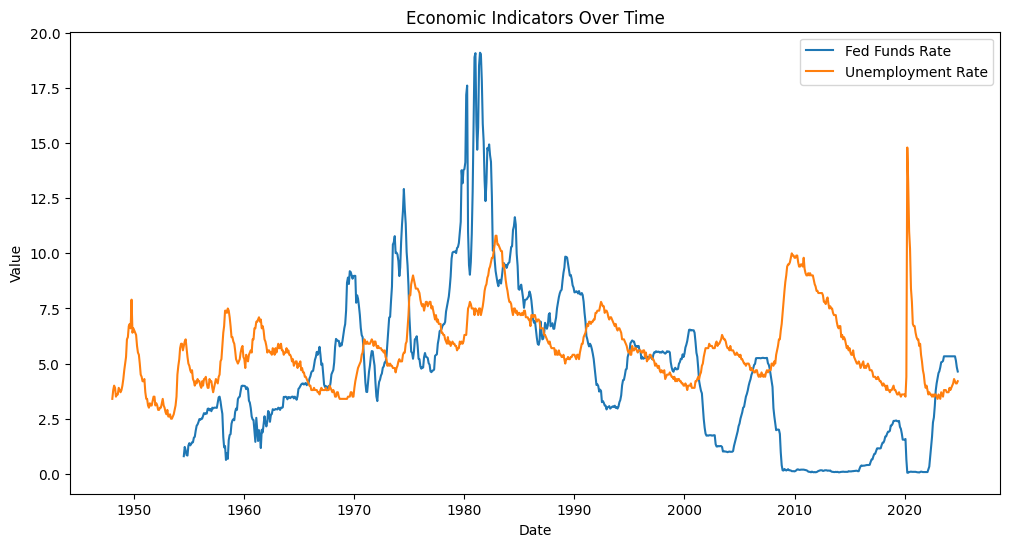

In [36]:
# Plot Fed Funds Rate and Unemployment Rate
plt.figure(figsize=(12, 6))
plt.plot(econ_data['Date'], econ_data['Fed Funds Rate'], label='Fed Funds Rate')
plt.plot(econ_data['Date'], econ_data['Unemployment Rate'], label='Unemployment Rate')
plt.legend()
plt.title("Economic Indicators Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

*Sentiment Analysis Summary*

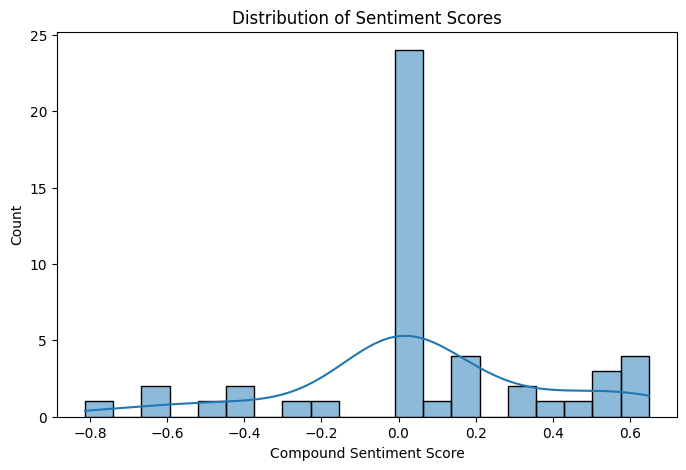

In [37]:
# Sentiment distribution
plt.figure(figsize=(8, 5))
sns.histplot(sentiment_df['compound'], bins=20, kde=True)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Compound Sentiment Score")
plt.show()

Saving the Dataset:

(Saving the merged dataset to a CSV file for easier access)

In [38]:
spy.to_csv('spy_data.csv', index=True)
econ_data.to_csv('economic_data.csv', index=False)
sentiment_df.to_csv('sentiment_data.csv', index=False)